# Benchmark the results cmopared with other methods

In [2]:
import numpy as np
import pandas as pd

import os, sys, tqdm, copy

import tqdm
import tqdm.notebook

import matplotlib.pyplot as plt
import matplotlib

style = [
    'seaborn-ticks',
    {
        'figure.dpi': 300,
        'font.size': 12,
        'image.cmap': 'inferno',
        'font.family': 'serif',
        'font.serif': ['Times', 'Times New Roman'] + plt.rcParams['font.serif'],
        'xtick.top': True,
        'xtick.direction': 'in',
        'ytick.right': True,
        'ytick.direction': 'in',
        'mathtext.fontset': 'cm'
        }]
plt.style.use(style)

import scipy.io

In [3]:
# github_dir = '/home/dingshandeng/github/ysoisochrone/'
github_dir = '/Users/dingshandeng/github/ysoisochrone/'

os.chdir(os.path.join(github_dir, 'tests'))
sys.path.append(os.path.join(github_dir))
import ysoisochrone.utils as utils
import ysoisochrone

## Compare with Pascucci 2016 (benchmark the ChamI targets)

In [4]:
## Read in the data

file_dir_t = os.path.join(github_dir, 'tests', 'data')

column_names = [
    'sou', 'SpTy', 'Ref', 'Teff', 'Lbol', 'log(mstar)', 'low(log(mstar))',
    'up(log(mstar))', 'log(age)', 'low(log(age))', 'up(log(age))'
]

df_ChamI_prop = pd.read_csv(os.path.join(file_dir_t, 'prop4Bayesian.txt'), delim_whitespace=True, comment=';', names=column_names)

df_prop = copy.deepcopy(df_ChamI_prop)

df_prop['Source'] = df_prop['sou']
# df_prop['Teff'] = df_prop['teff']
df_prop['Luminosity'] = df_prop['Lbol']

print(df_prop.columns)

# For USco targets
# toobright = ['J16113134-1838259']  
# toofaint = ['0']

toobright = ['J11065906-7718535','J11094260-7725578',
   		     'J11105597-7645325','J11183572-7935548'] # ; all in Baraffe iso.
toofaint = ['J10533978-7712338','J11063945-7736052','J11082570-7716396',
            'J11111083-7641574','J11160287-7624533'] # ,'J10561638-7630530'] # ; one in Feiden iso.
    
median_age = 6.48 # Myrs, the age took from Pasucci+2016 choice

df_prop

Index(['sou', 'SpTy', 'Ref', 'Teff', 'Lbol', 'log(mstar)', 'low(log(mstar))',
       'up(log(mstar))', 'log(age)', 'low(log(age))', 'up(log(age))', 'Source',
       'Luminosity'],
      dtype='object')


,sou,SpTy,Ref,Teff,Lbol,log(mstar),low(log(mstar)),up(log(mstar)),log(age),low(log(age)),up(log(age)),Source,Luminosity
0,J10533978-7712338,M2,M16b,3560.0,0.016,-0.41,0.00,0.00,6.48,0.00,0.00,J10533978-7712338,0.016
1,J10555973-7724399,K7,M16a,4060.0,0.180,-0.13,-0.17,-0.07,7.18,6.92,7.45,J10555973-7724399,0.180
2,J10561638-7630530,M6.5,M16b,2935.0,0.080,-0.96,-1.03,-0.89,5.76,5.71,5.94,J10561638-7630530,0.080
3,J10563044-7711393,K7,M16a,4060.0,0.430,-0.07,-0.15,0.19,6.61,6.35,6.88,J10563044-7711393,0.430
4,J10574219-7659356,M3,M16b,3415.0,0.530,-0.52,-0.57,-0.47,5.75,5.71,5.83,J10574219-7659356,0.530
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,J11173700-7704381,M0.5,M14,3780.0,0.420,-0.28,-0.39,-0.17,6.25,5.97,6.51,J11173700-7704381,0.420
89,J11175211-7629392,M4.5,L07,3198.0,0.087,-0.69,-0.77,-0.61,6.41,6.22,6.59,J11175211-7629392,0.087
90,J11183572-7935548,M5,M16b,3125.0,0.260,-0.77,0.00,0.00,5.71,0.00,0.00,J11183572-7935548,0.260
91,J11241186-7630425,M5.5,M16b,3060.0,0.030,-0.90,-0.99,-0.79,6.65,6.49,6.80,J11241186-7630425,0.030


In [5]:
best_logmass_output, best_logage_output, lmass_all, lage_all =\
    ysoisochrone.bayesian.derive_stellar_mass_age(df_prop, model='Baraffe_n_Feiden', isochrone_data_dir=None, no_uncertainties=True, plot=False, save_fig=False, save_lfunc=False, fig_save_dir='figures', csv_save_dir='lfunc_data', verbose=False, toobright=toobright, toofaint=toofaint, median_age=median_age)

100%|██████████| 93/93 [00:02<00:00, 46.49it/s]


In [6]:
df_output_mass = pd.DataFrame(np.array(best_logmass_output), columns=['logmass[msolar]', 'lw_logmass[msolar]', 'up_logmass[msolar]'])
df_output_age = pd.DataFrame(np.array(best_logage_output), columns=['logage[yrs]', 'lw_logage[yrs]', 'up_logage[yrs]']) 
df_output = pd.concat([df_prop, df_output_mass, df_output_age], axis=1)

df_output.loc[:, 'masses[msolar]'] = 10**df_output.loc[:, 'logmass[msolar]'].values
df_output.loc[:, 'lw_masses[msolar]'] = 10**df_output.loc[:, 'lw_logmass[msolar]']
df_output.loc[:, 'up_masses[msolar]'] = 10**df_output.loc[:, 'up_logmass[msolar]']

df_output.loc[:, 'age[Myrs]'] = 10**df_output.loc[:, 'logage[yrs]']/1e6
df_output.loc[:, 'lw_age[Myrs]'] = 10**df_output.loc[:, 'lw_logage[yrs]']/1e6
df_output.loc[:, 'up_age[Myrs]'] = 10**df_output.loc[:, 'up_logage[yrs]']/1e6

# Then you can save this output file
df_output.to_csv(os.path.join(file_dir_t, 'chamI_prop4Bayesian_o.csv'), index=False)

In [7]:
from astropy.io import ascii

file_dir_t = os.path.join(github_dir, 'tests', 'data')

# # read in the Pasccuci+2016 table 1
# file_t = os.path.join(file_dir_t, 'Pascucci2016_Tab1_mrt.txt')

# # Read the table with the correct data start line
# table_P2016 = ascii.read(file_t, delimiter='|')

# # Convert to pandas DataFrame
# df_P2016 = table_P2016.to_pandas()

# read in the txt file Ilaria shared
file_t = os.path.join(file_dir_t, 'mstar.txt')
df_P2016 = pd.read_table(file_t, comment=';', delim_whitespace=True,
                         names=['Sources', 
                                'logM*', 'b_logM*', 'B_logM*', 'simple_logM*',
                                'logage', 'b_logage', 'B_logage', 'simple_logage'])
# df_P2016 = pd.read_csv(file_t, comment=';', delimiter=' ')

# Print the DataFrame
print(df_P2016)

              Sources  logM*  b_logM*  B_logM*  simple_logM*  logage  \
0   J10533978-7712338  -0.41     0.00     0.00          0.00    6.48   
1   J10555973-7724399  -0.13    -0.17    -0.07          0.00    7.18   
2   J10561638-7630530  -0.96    -1.03    -0.89         -0.97    5.76   
3   J10563044-7711393  -0.07    -0.15     0.19          0.00    6.61   
4   J10574219-7659356  -0.52    -0.57    -0.47         -0.55    5.75   
..                ...    ...      ...      ...           ...     ...   
88  J11173700-7704381  -0.28    -0.39    -0.17         -0.30    6.25   
89  J11175211-7629392  -0.69    -0.77    -0.61         -0.70    6.41   
90  J11183572-7935548  -0.77     0.00     0.00          0.00    5.71   
91  J11241186-7630425  -0.90    -0.99    -0.79         -0.92    6.65   
92  J11432669-7804454  -0.86    -0.93    -0.79         -0.85    6.19   

    b_logage  B_logage  simple_logage  
0       0.00      0.00           0.00  
1       6.92      7.45           0.00  
2       5.71   

In [8]:
df_output['P2016_logmass[msolar]'] = df_P2016['logM*'].values
df_output['P2016_lw_logmass[msolar]'] = df_P2016['b_logM*'].values
df_output['P2016_up_logmass[msolar]'] = df_P2016['B_logM*'].values
df_output['P2016_logage[yrs]'] = df_P2016['logage'].values
df_output['P2016_lw_logage[yrs]'] = df_P2016['b_logage'].values
df_output['P2016_up_logage[yrs]'] = df_P2016['B_logage'].values

Make the comparison plot

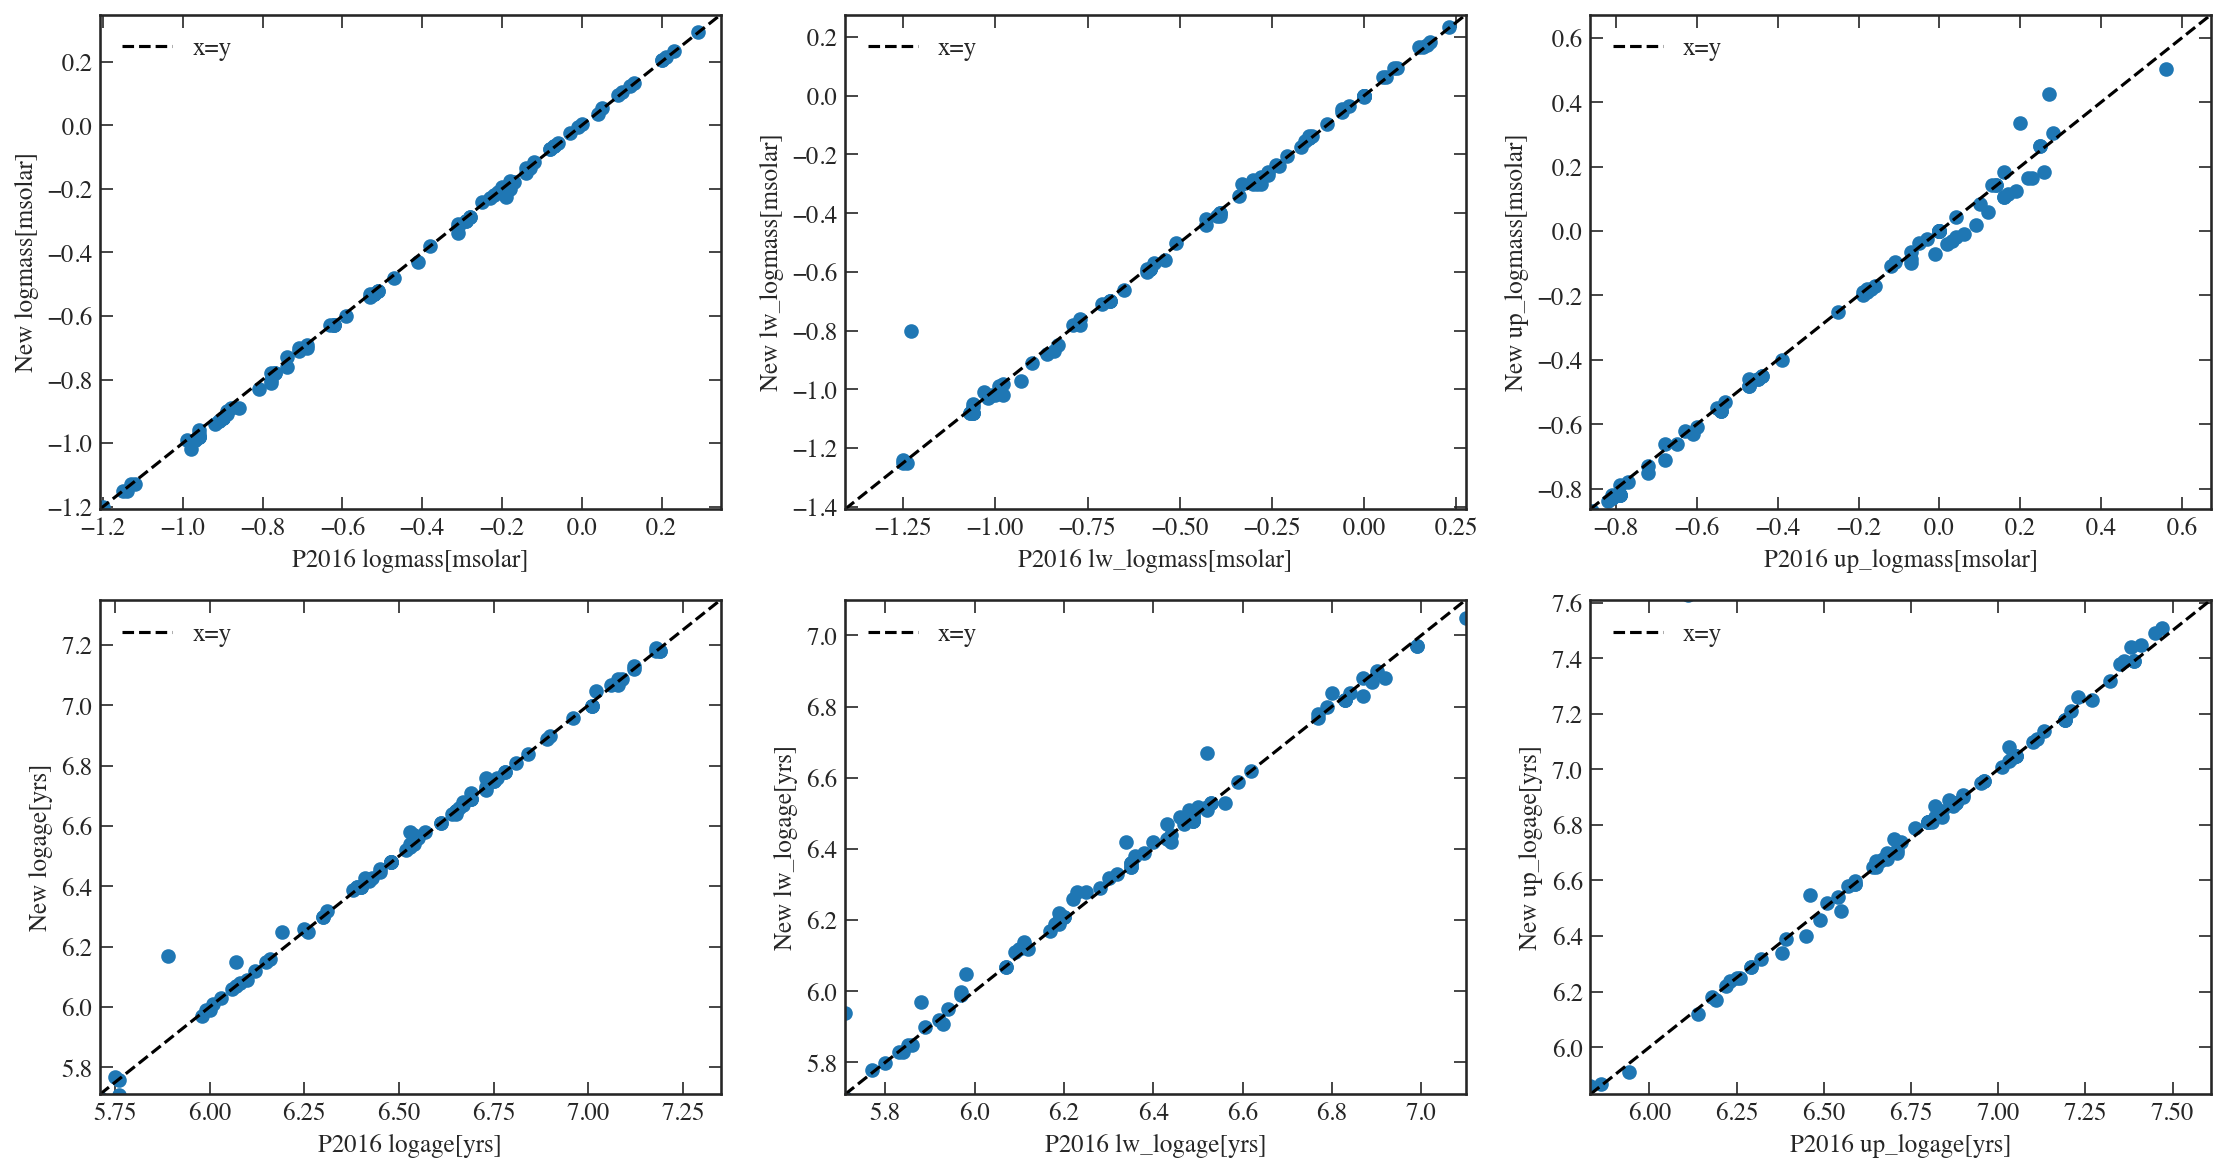

In [9]:
fig = plt.figure(dpi=150, figsize=(15, 8))

for column_t, i_plot in zip(['logmass[msolar]',
                             'lw_logmass[msolar]',
                             'up_logmass[msolar]',
                             'logage[yrs]',
                             'lw_logage[yrs]',
                             'up_logage[yrs]']
    ,[1, 2, 3, 4, 5, 6]):
    
    ax = fig.add_subplot(2,3,i_plot)
    ax.set_xlabel('P2016 %s'%(column_t))
    ax.set_ylabel('New %s'%(column_t))

    # ax.scatter(df_P2016['logM*'].values, df_P2016['logM*'].values)
    xt = df_output['P2016_%s'%(column_t)].values
    yt = df_output['%s'%(column_t)].values
    ax.scatter(xt, yt)

    if 'mass' in column_t:
        line = np.linspace(0.8*np.nanmin(xt), 1.2*np.nanmax(xt), 100)
    elif column_t == 'logage[yrs]':
        line = np.linspace(1.0*np.nanmin(xt), 1.0*np.nanmax(xt), 100)
    else:
        xt_t = xt.copy()
        xt_t[xt_t < 1e-5] = np.nan
        line = np.linspace(1.0*np.nanmin(xt_t), 1.0*np.nanmax(xt_t), 100)
    ax.plot(line, line, c='k', linestyle='--', label='x=y')

    ax.set_xlim(np.min(line), np.max(line))
    ax.set_ylim(ax.get_xlim())

    ax.legend()
    
fig.tight_layout()
plt.show()

In [10]:
err_Teff = utils.assign_unc_teff(df_output['Teff'].values)
err_Lumi = utils.assign_unc_lumi(df_output['Luminosity'].values)
df_output['e_Teff'] = err_Teff
df_output['e_Luminosity'] = err_Lumi

In [24]:
test_columns = [
    # 'logmass[msolar]',
    # 'lw_logmass[msolar]',
    # 'up_logmass[msolar]',
    'logage[yrs]',
    # 'lw_logage[yrs]',
    # 'up_logage[yrs]'
                ]
# 
# test_columns = ['logage[yrs]']

logi_all = np.zeros(len(df_output))
for column_t in test_columns:
    # column_t = 'logage[yrs]'
    xt = df_output['P2016_%s'%(column_t)].values
    yt = df_output['%s'%(column_t)].values
    logi_t = (np.abs(xt - yt)/np.abs(xt) > 0.01)
    logi_all = np.logical_or(logi_all, logi_t)

# yt/xt > 1.05
# np.nanmax(yt/xt)
# df_problematic = df_output[yt-xt > 0.05]
df_problematic = df_output[logi_all]
print('number of target that has differences:', len(df_problematic))

number of target that has differences: 2


In [25]:
# df_problematic.loc[:, ['Source', 'logmass[msolar]', 'P2016_logmass[msolar]', 'logage[yrs]', 'P2016_logage[yrs]']]

In [26]:
# df_P2016[df_P2016['Sources'] == 'J11083952-7734166']

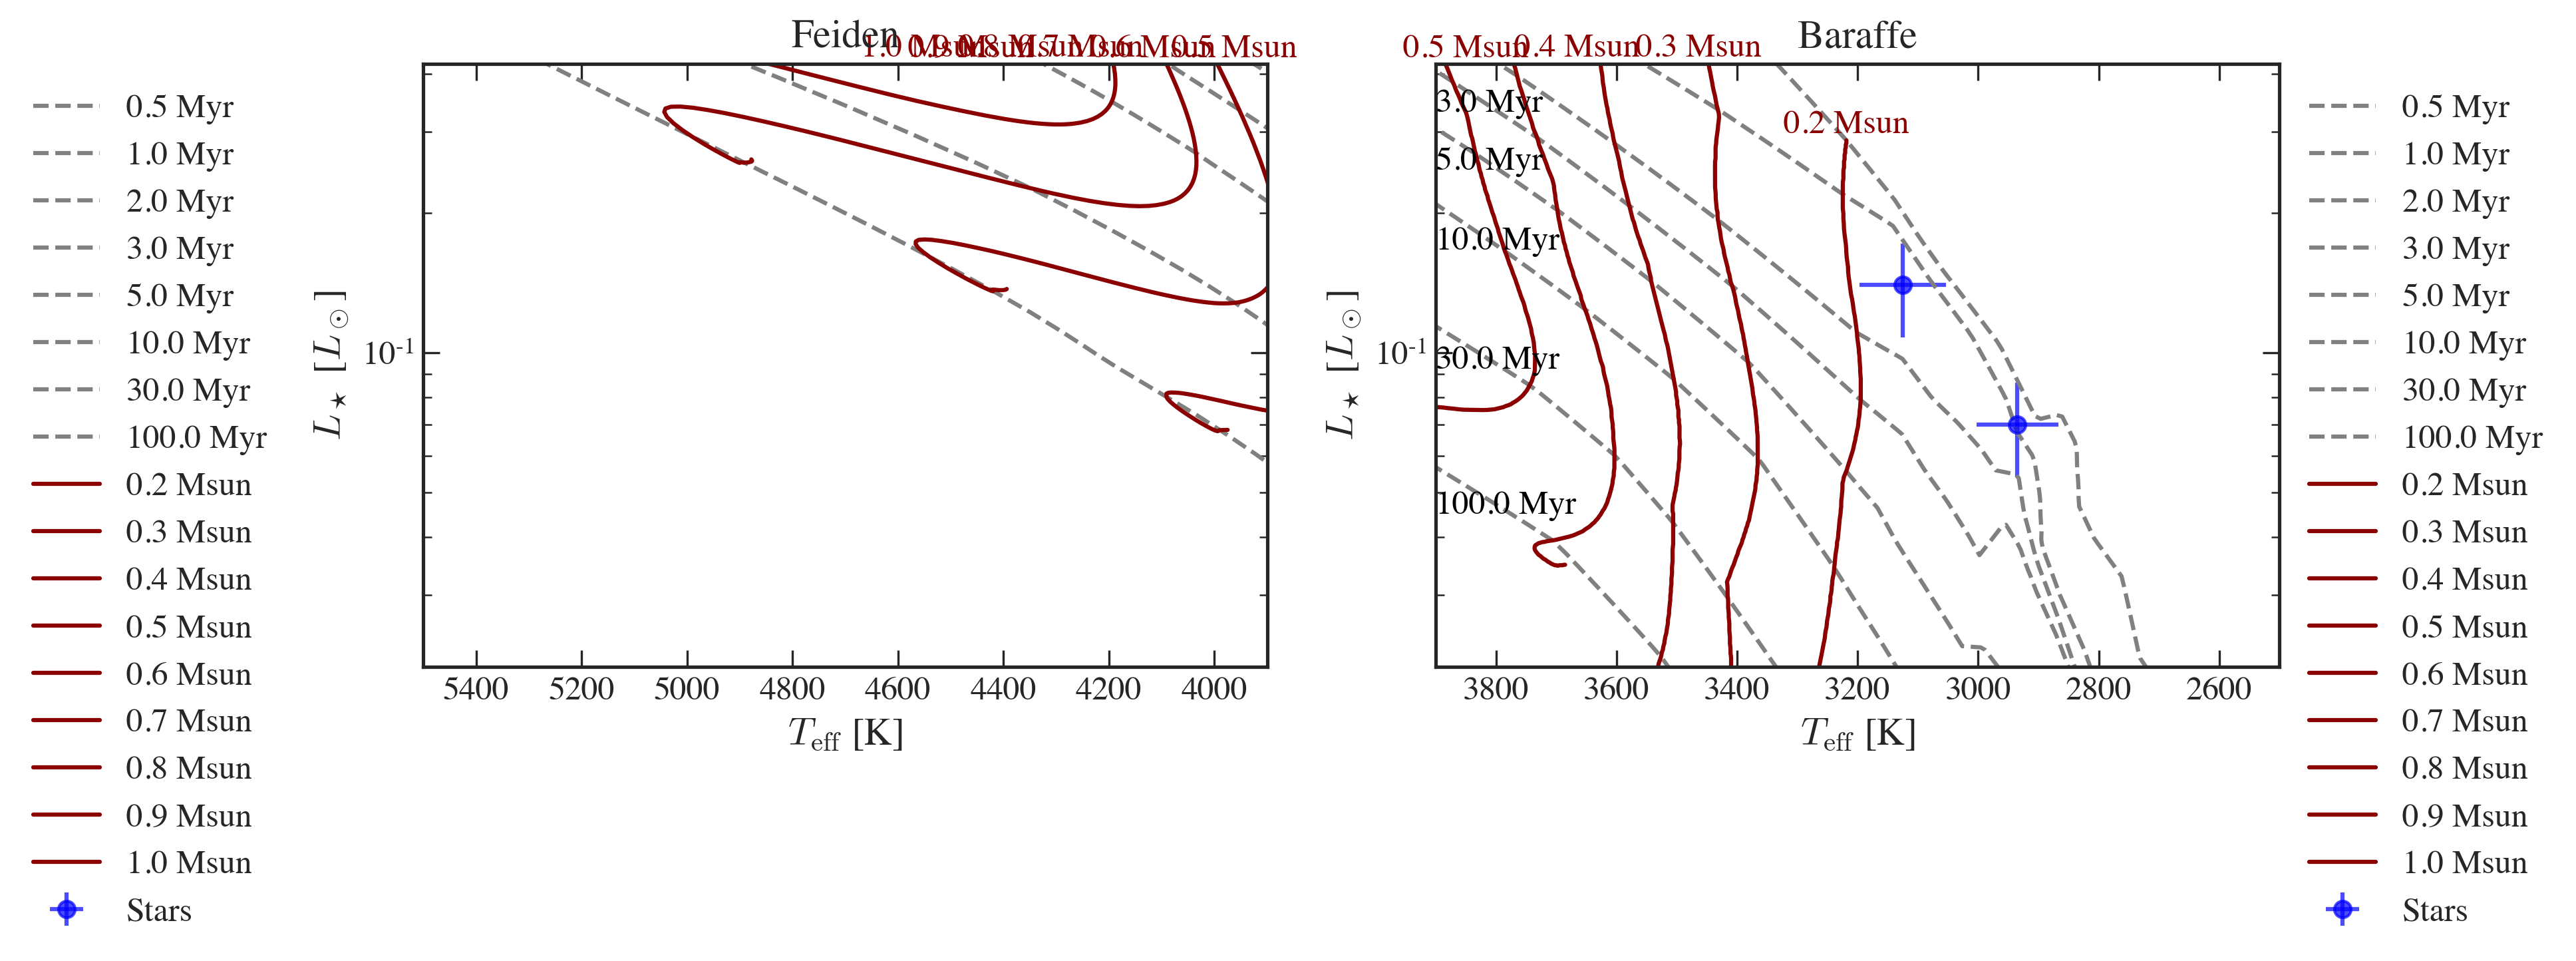

In [27]:
isochrone = ysoisochrone.isochrone.Isochrone()

fig, axes = plt.subplots(1,2,figsize=(12, 4))

isochrone.set_tracks('Feiden2016')
# isochrone.set_tracks('Baraffe2015')

ysoisochrone.plotting.plot_hr_diagram(isochrone, df_problematic, ax_set=axes[0], ages_to_plot=[0.5e6, 1.0e6, 2.0e6, 3.0e6, 5.0e6, 10.0e6, 30.0e6, 100.0e6], xlim_set=[5500, 3900]) # , masses_to_plot=[0.1, 0.2, 0.3], xlim_set=[3500, 2500]) , ylim_set=[0.001, 1.0]

axes[0].set_title('Feiden')
axes[0].legend(bbox_to_anchor=(-0.15, 1.0), loc='upper right')

isochrone.set_tracks('Baraffe2015')

ysoisochrone.plotting.plot_hr_diagram(isochrone, df_problematic, ax_set=axes[1], ages_to_plot=[0.5e6, 1.0e6, 2.0e6, 3.0e6, 5.0e6, 10.0e6, 30.0e6, 100.0e6], xlim_set=[3900, 2500]) # , masses_to_plot=[0.1, 0.2, 0.3], xlim_set=[3500, 2500]) , ylim_set=[0.001, 1.0]

axes[1].set_title('Baraffe')
# axes[0].legend(bbox_to_anchor=(-0.15, 1.0), loc='upper right')

plt.show()

## Compare with PARSEC / MIST -- online sources

## Read in the tables

In [4]:
df_prop = pd.read_csv('./target_info.csv')

# For test targets from Lupus
toobright = [] # ['0']
toofaint = [] # ['0']
median_age = 1.0 # Myrs

In [5]:
df_prop

,Source,Teff,e_Teff,Luminosity,e_Luminosity
0,Sz65,4060,187.0,0.869,0.3623
1,Sz71,3632,167.0,0.327,0.1420
2,J16124373-3815031,3705,171.0,0.390,0.2691
3,Sz72,3560,164.0,0.272,0.1160
4,Sz77,4060,187.0,0.593,0.2428
5,J16085324-3914401,3415,79.0,0.198,0.1477
6,Sz131,3415,79.0,0.150,0.0583
7,Sz66,3415,79.0,0.216,0.0920
8,Sz95,3415,79.0,0.267,0.1842
9,V1094Sco,4205,193.0,1.210,0.8633


## First test PARSEC

/Users/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:106: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/Users/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:114: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = plt.colorbar(im)


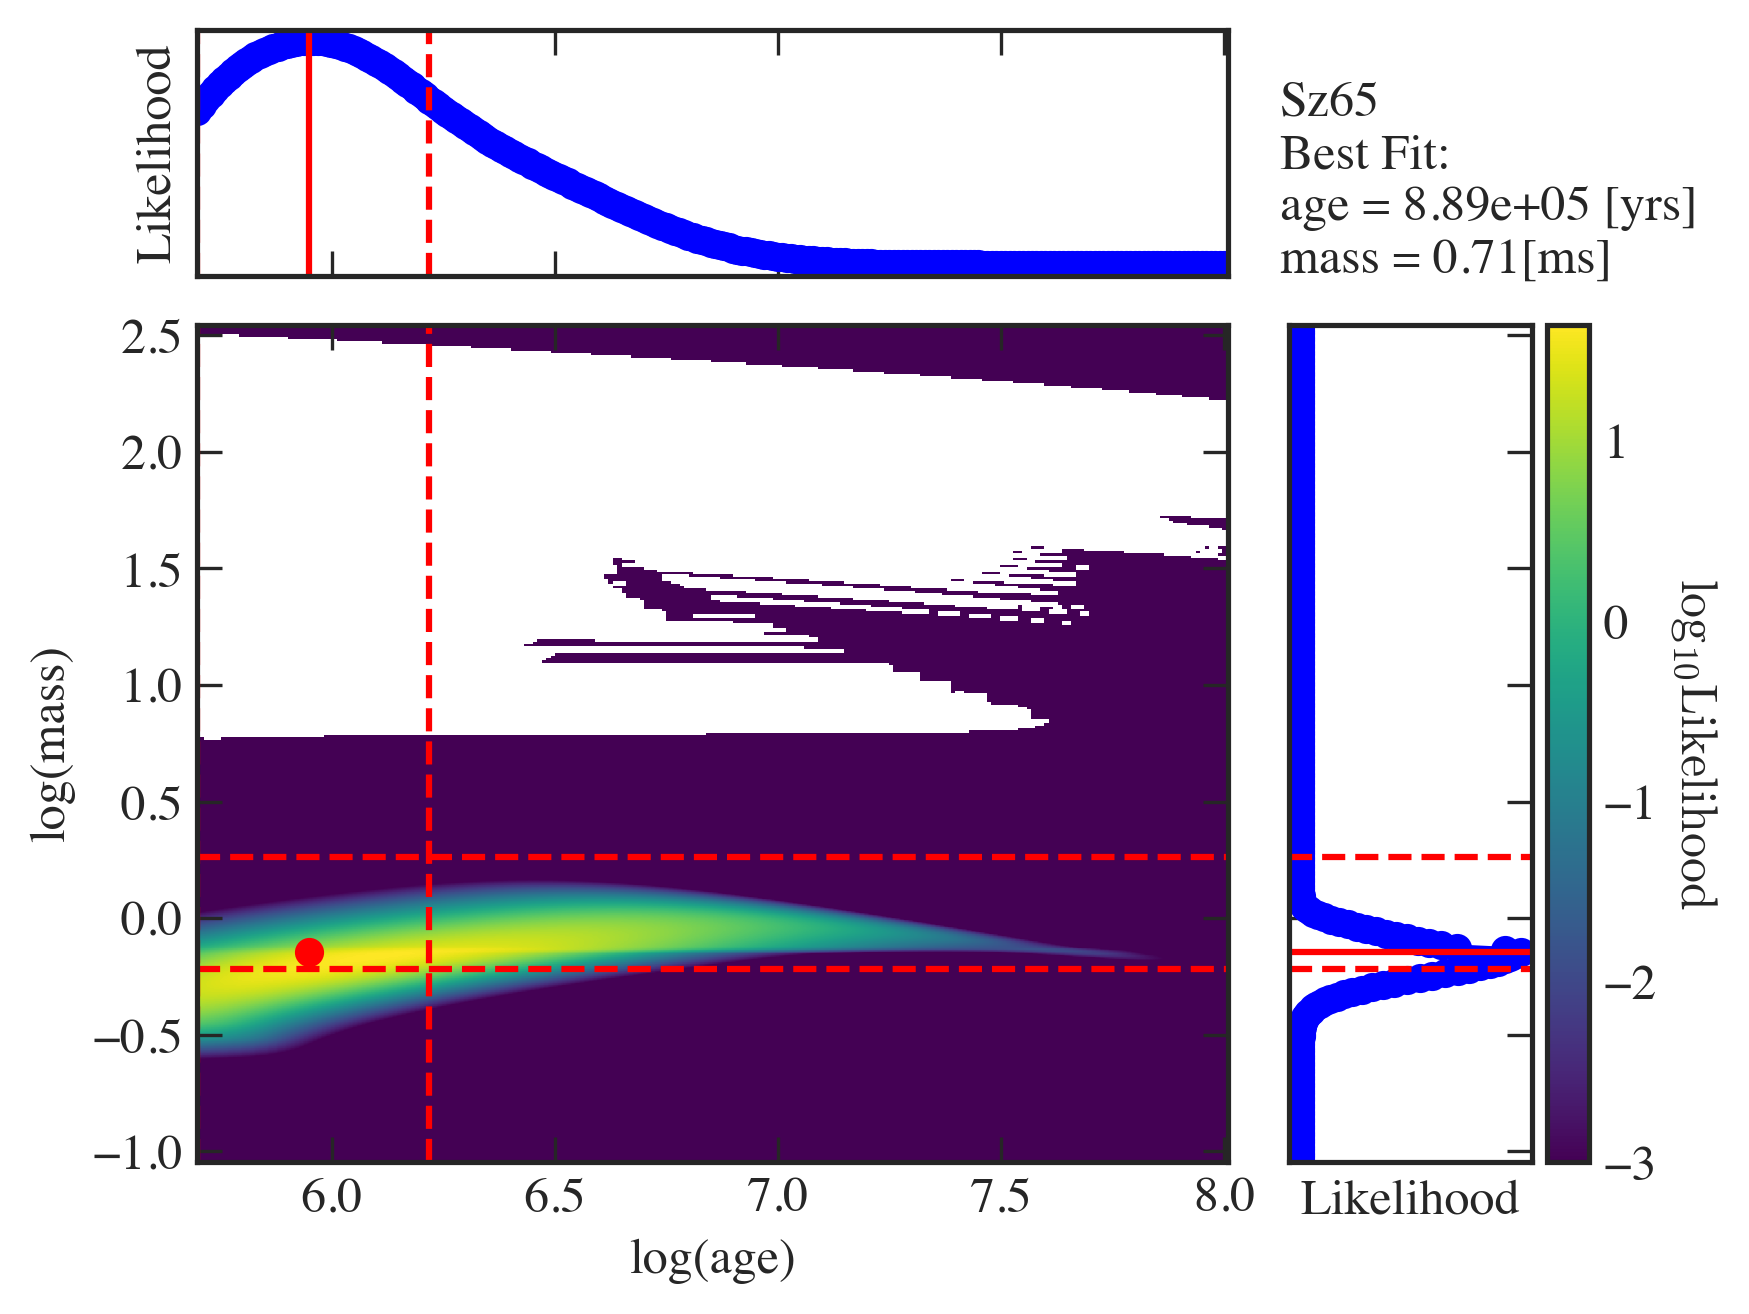

/Users/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:106: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/Users/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:114: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = plt.colorbar(im)


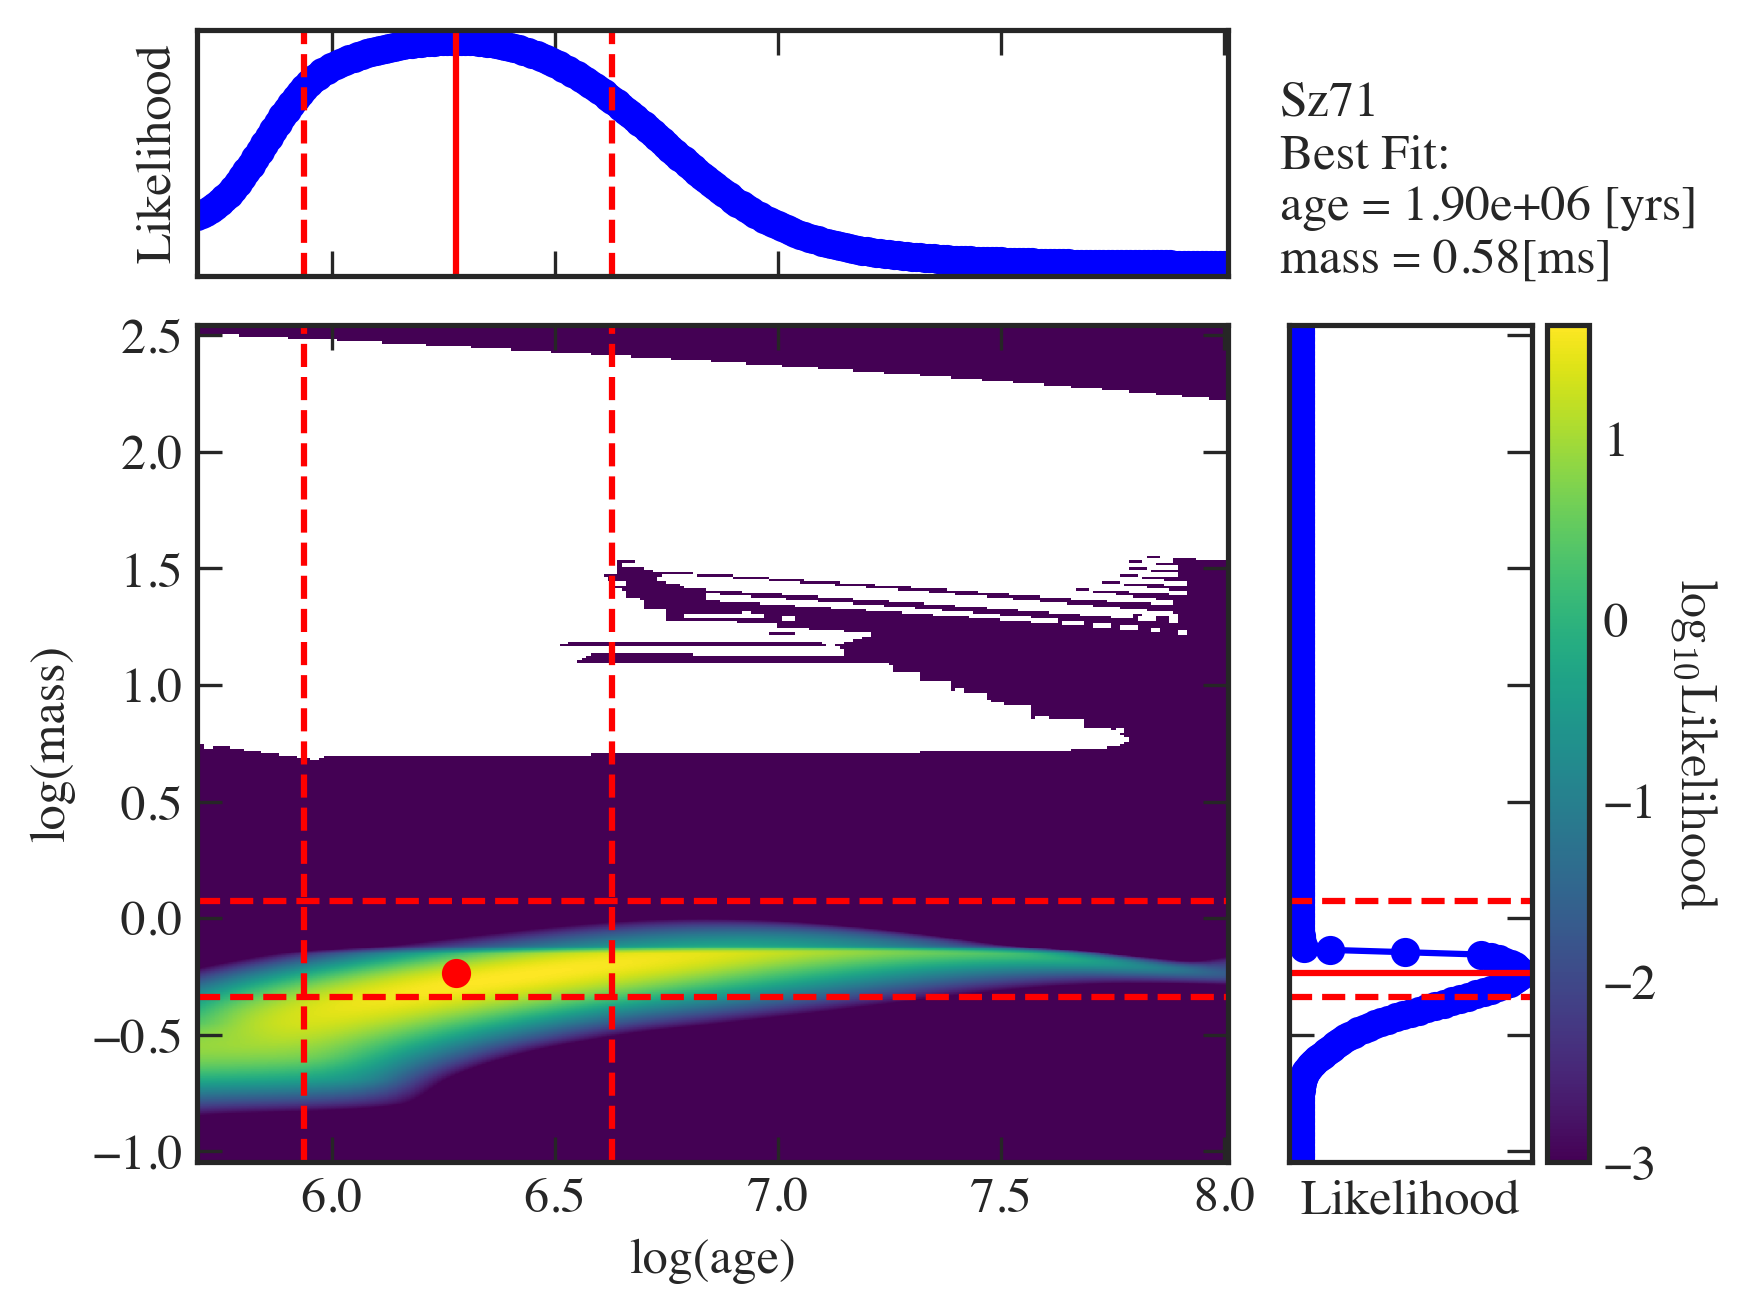

/Users/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:106: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/Users/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:114: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = plt.colorbar(im)


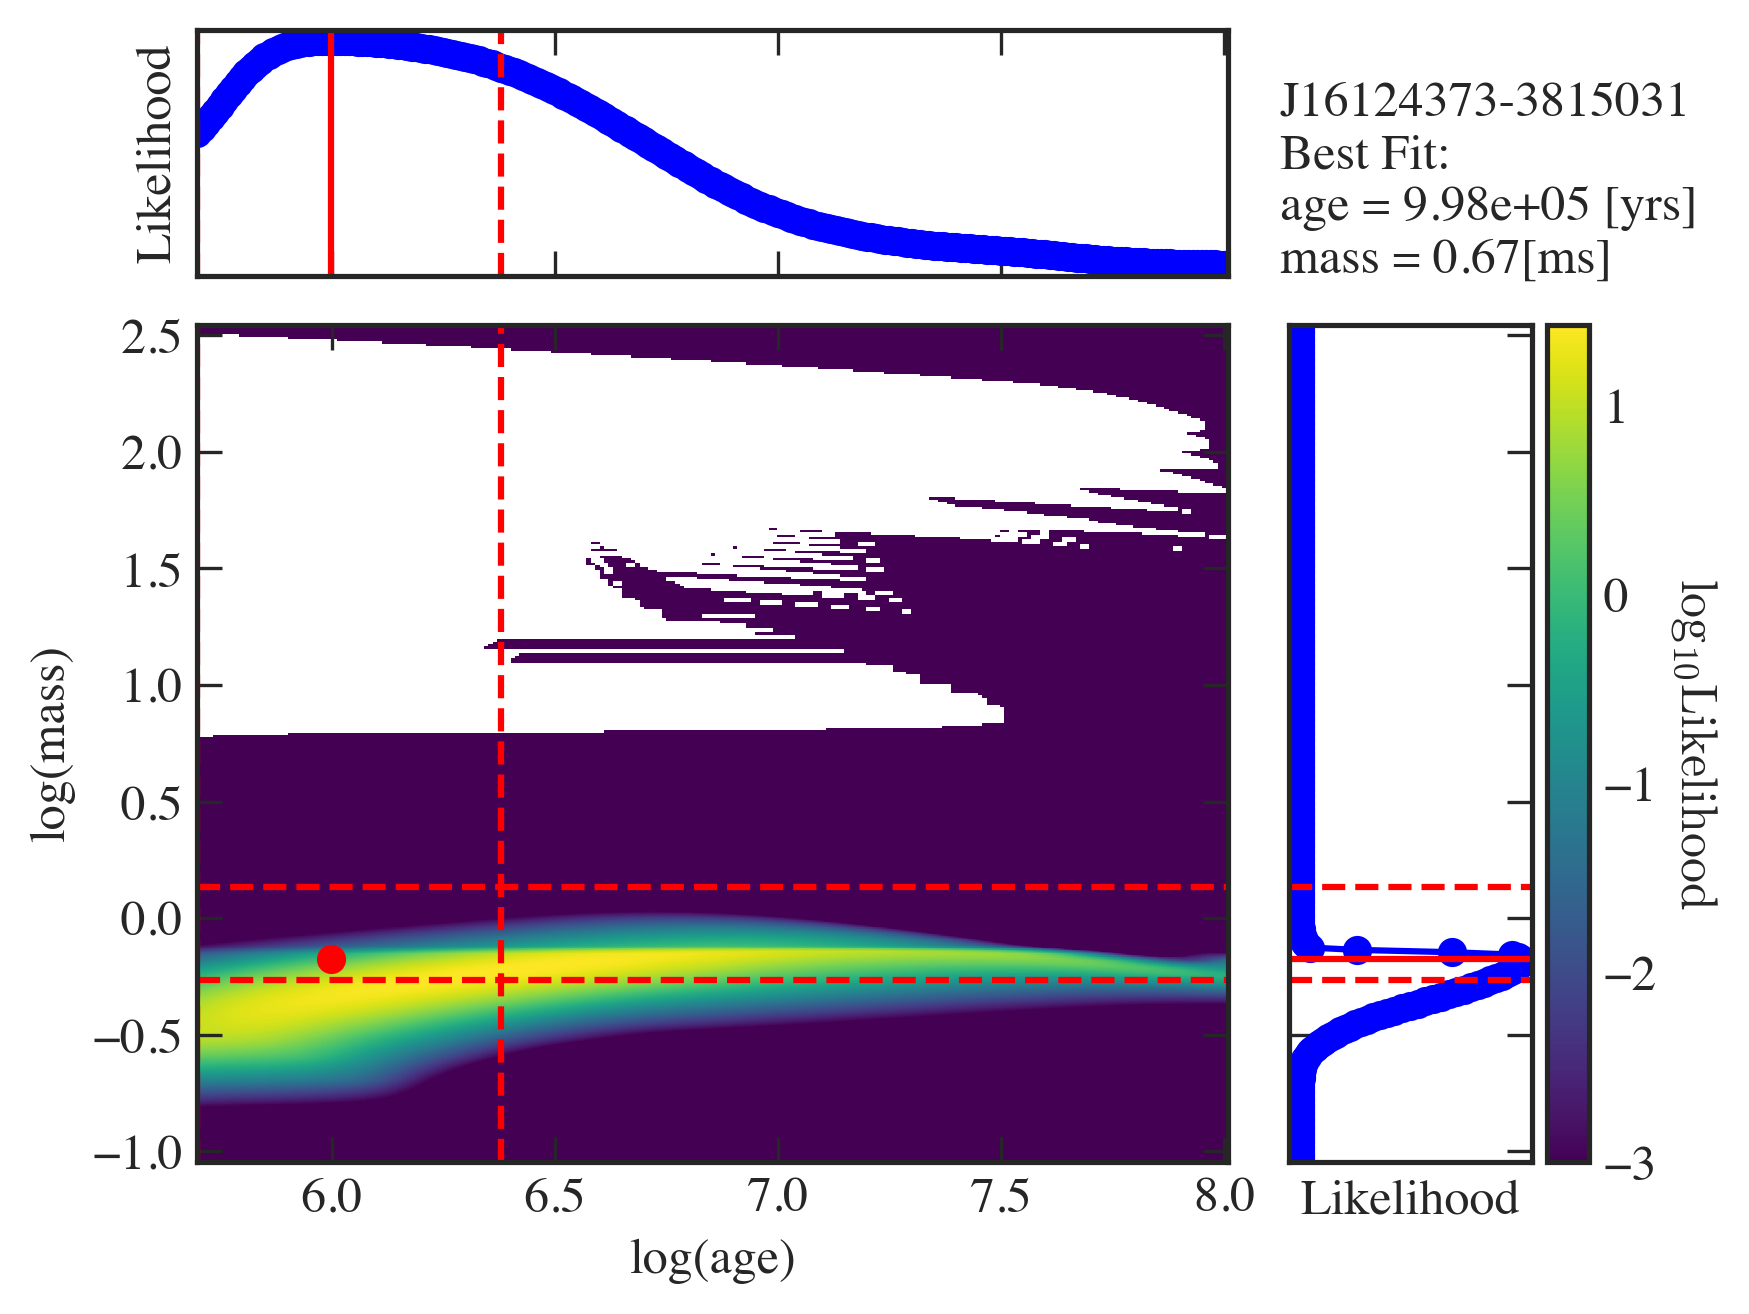

/Users/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:106: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/Users/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:114: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = plt.colorbar(im)


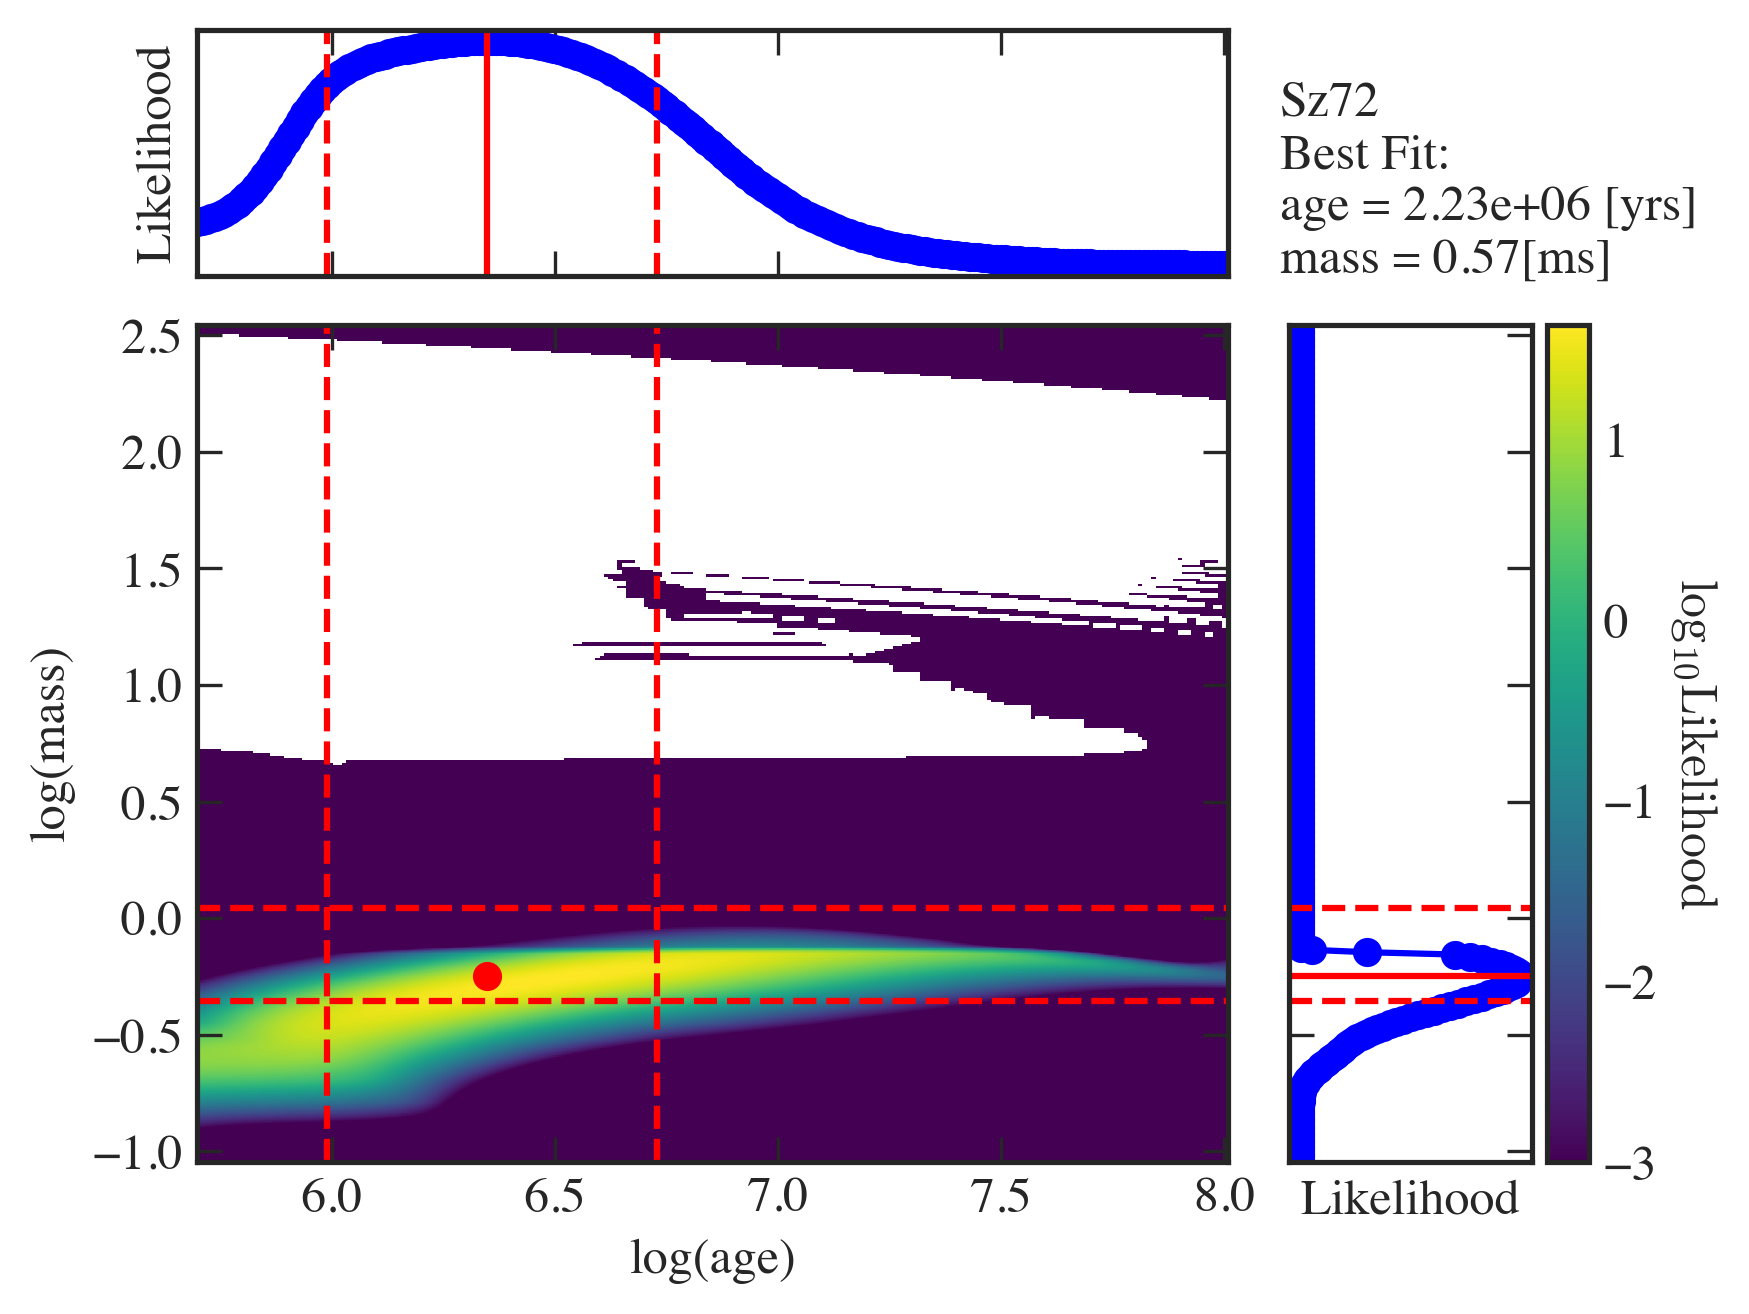

/Users/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:106: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/Users/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:114: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = plt.colorbar(im)


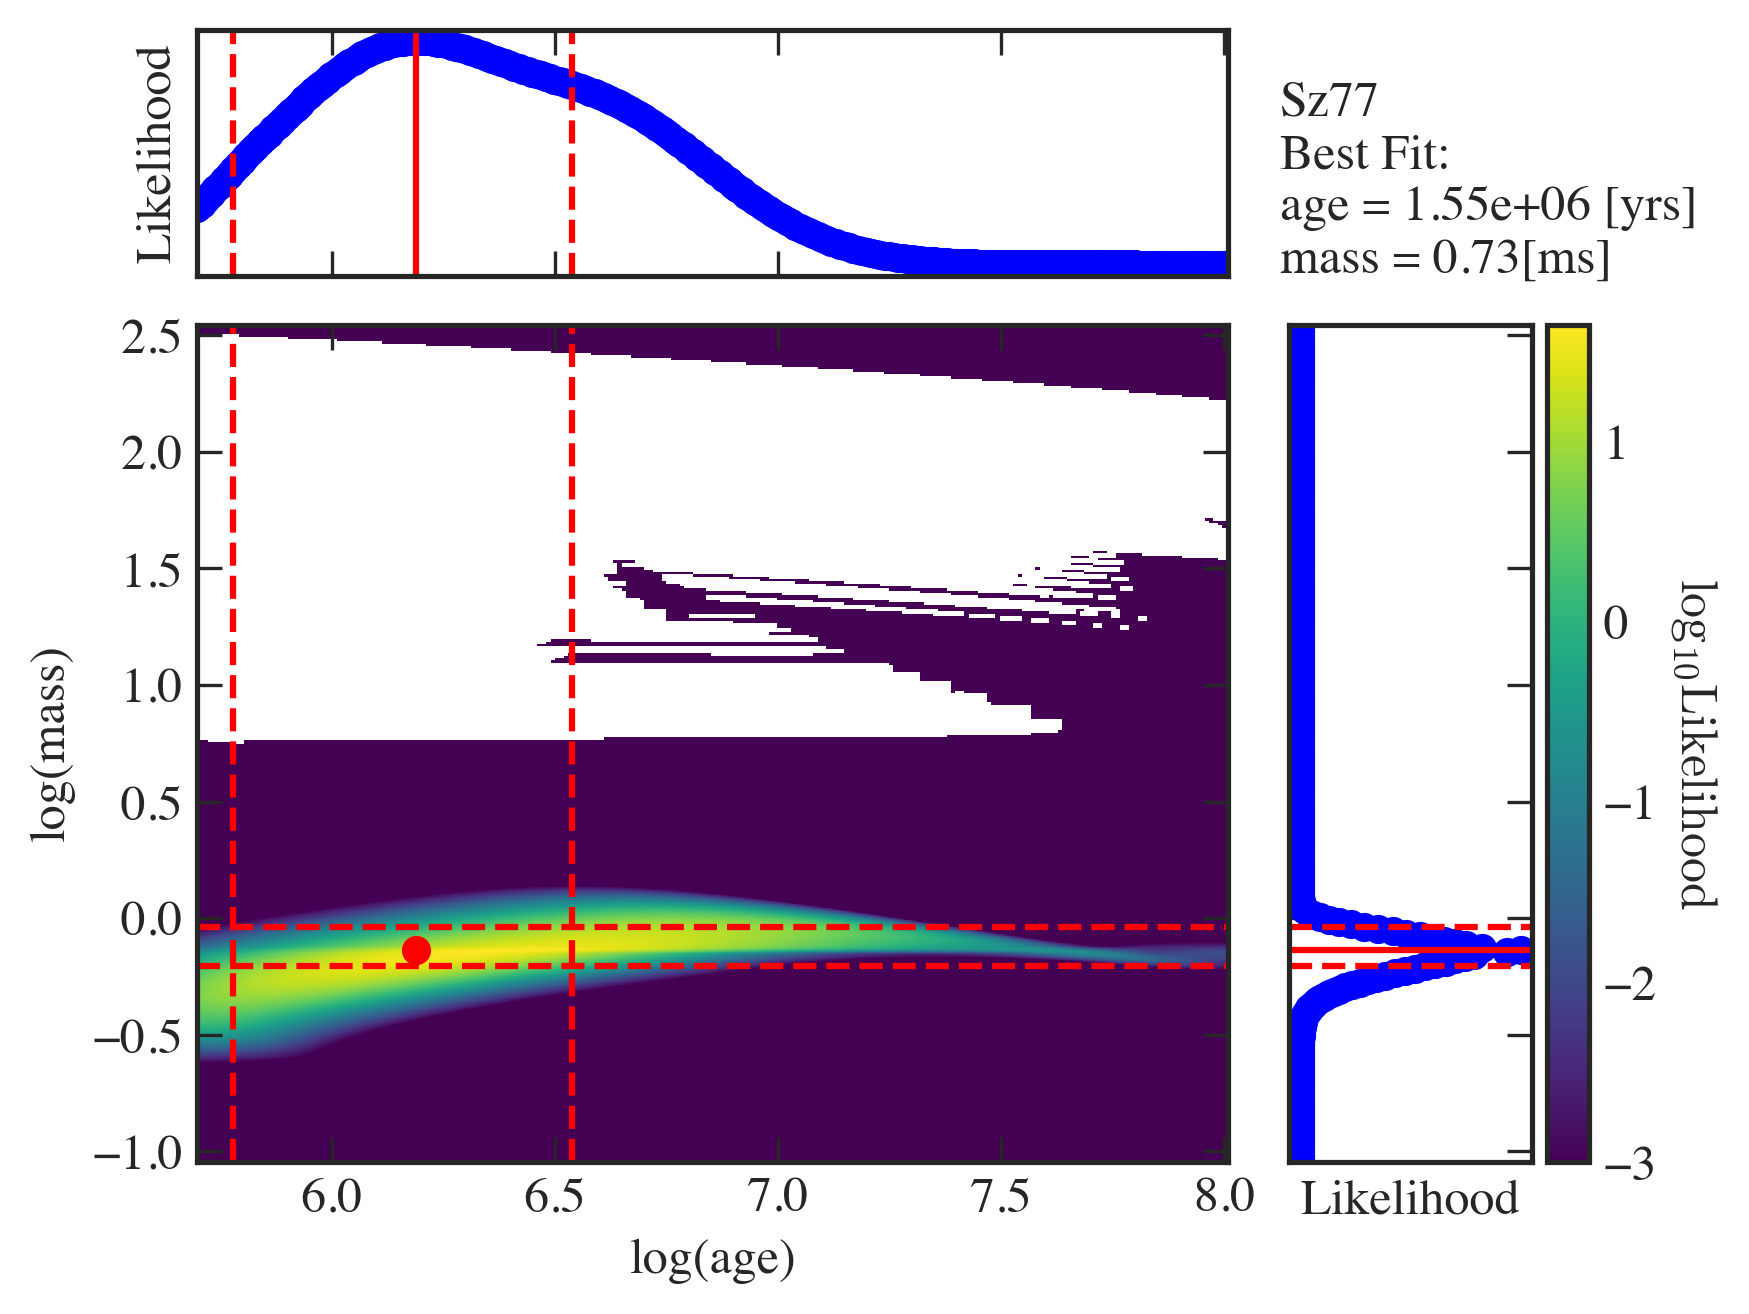

/Users/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:106: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/Users/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:114: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = plt.colorbar(im)


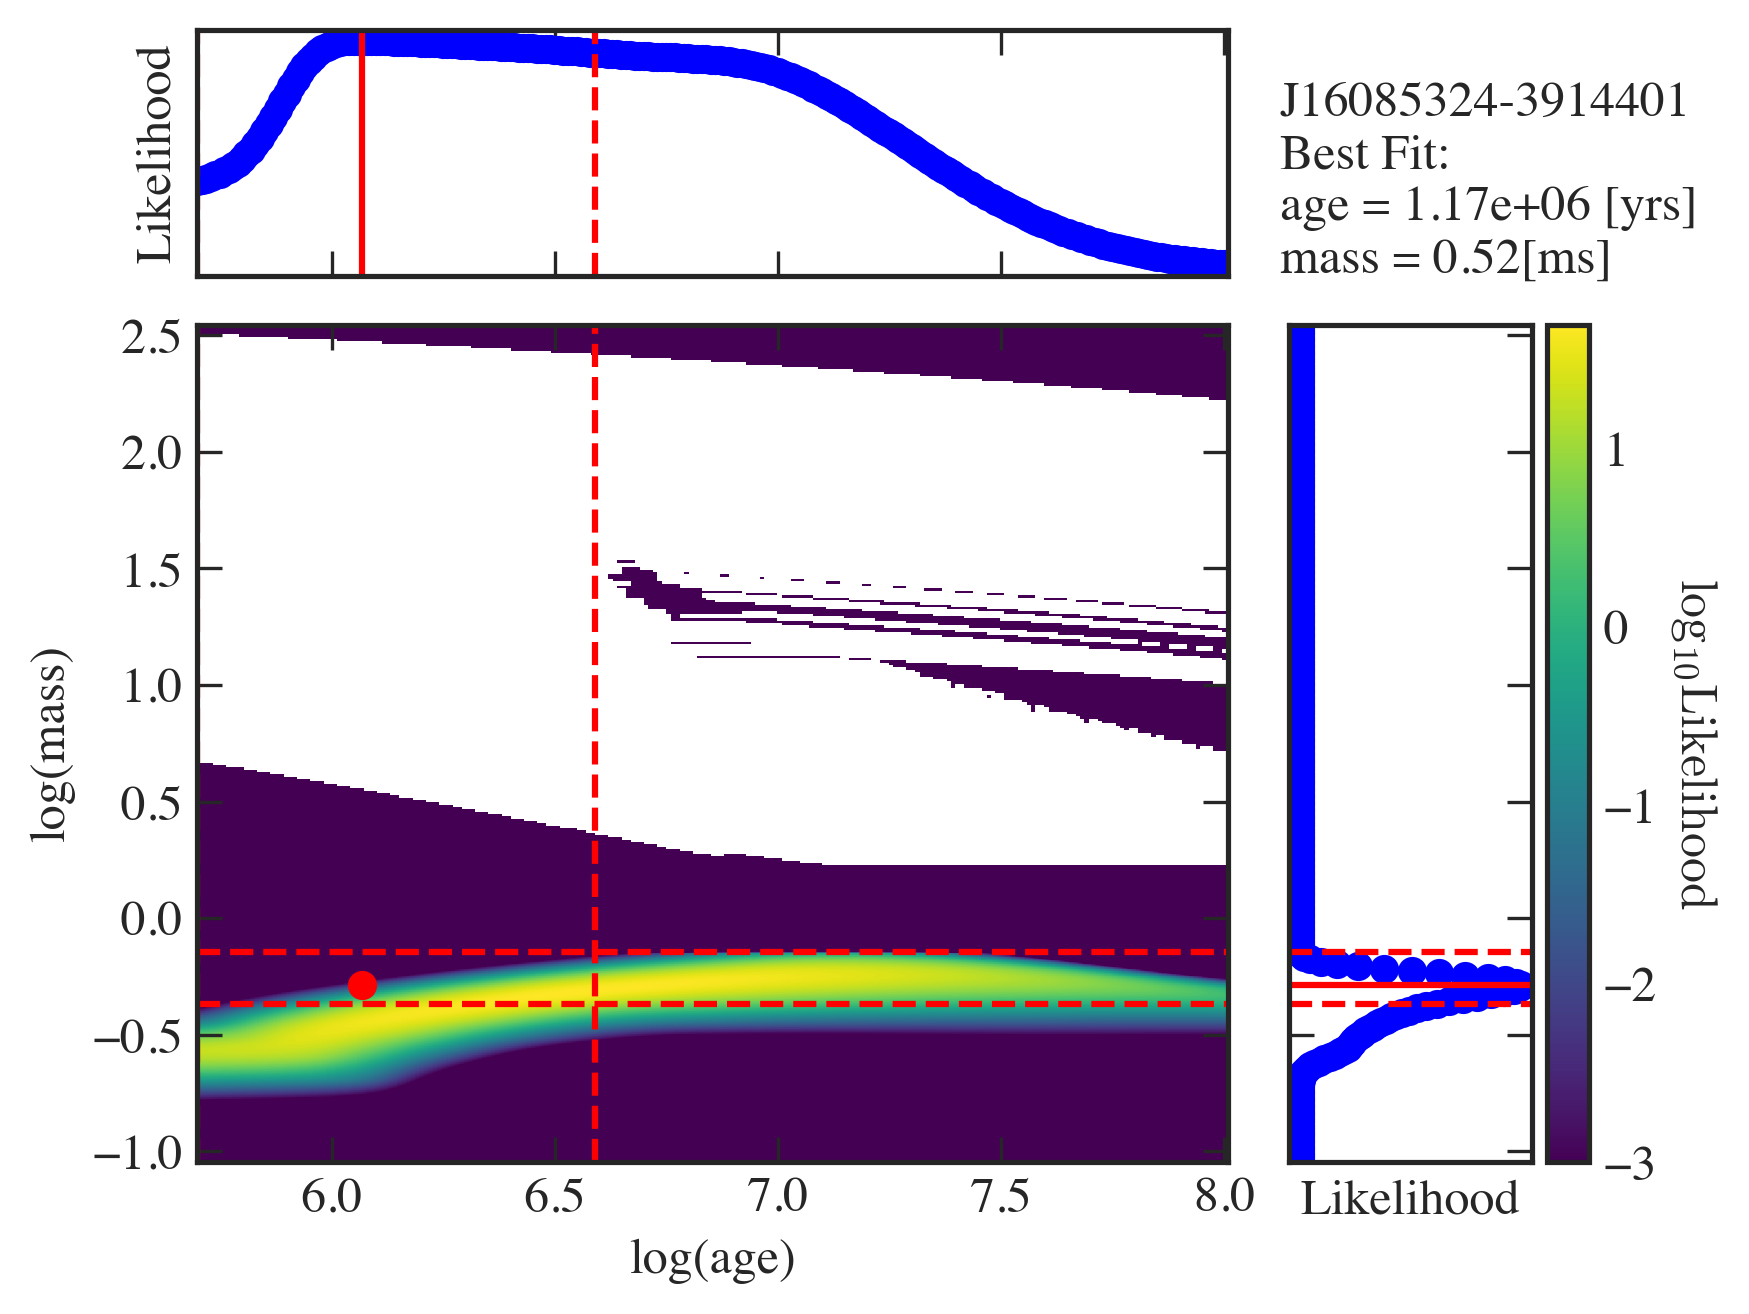

/Users/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:106: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/Users/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:114: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = plt.colorbar(im)


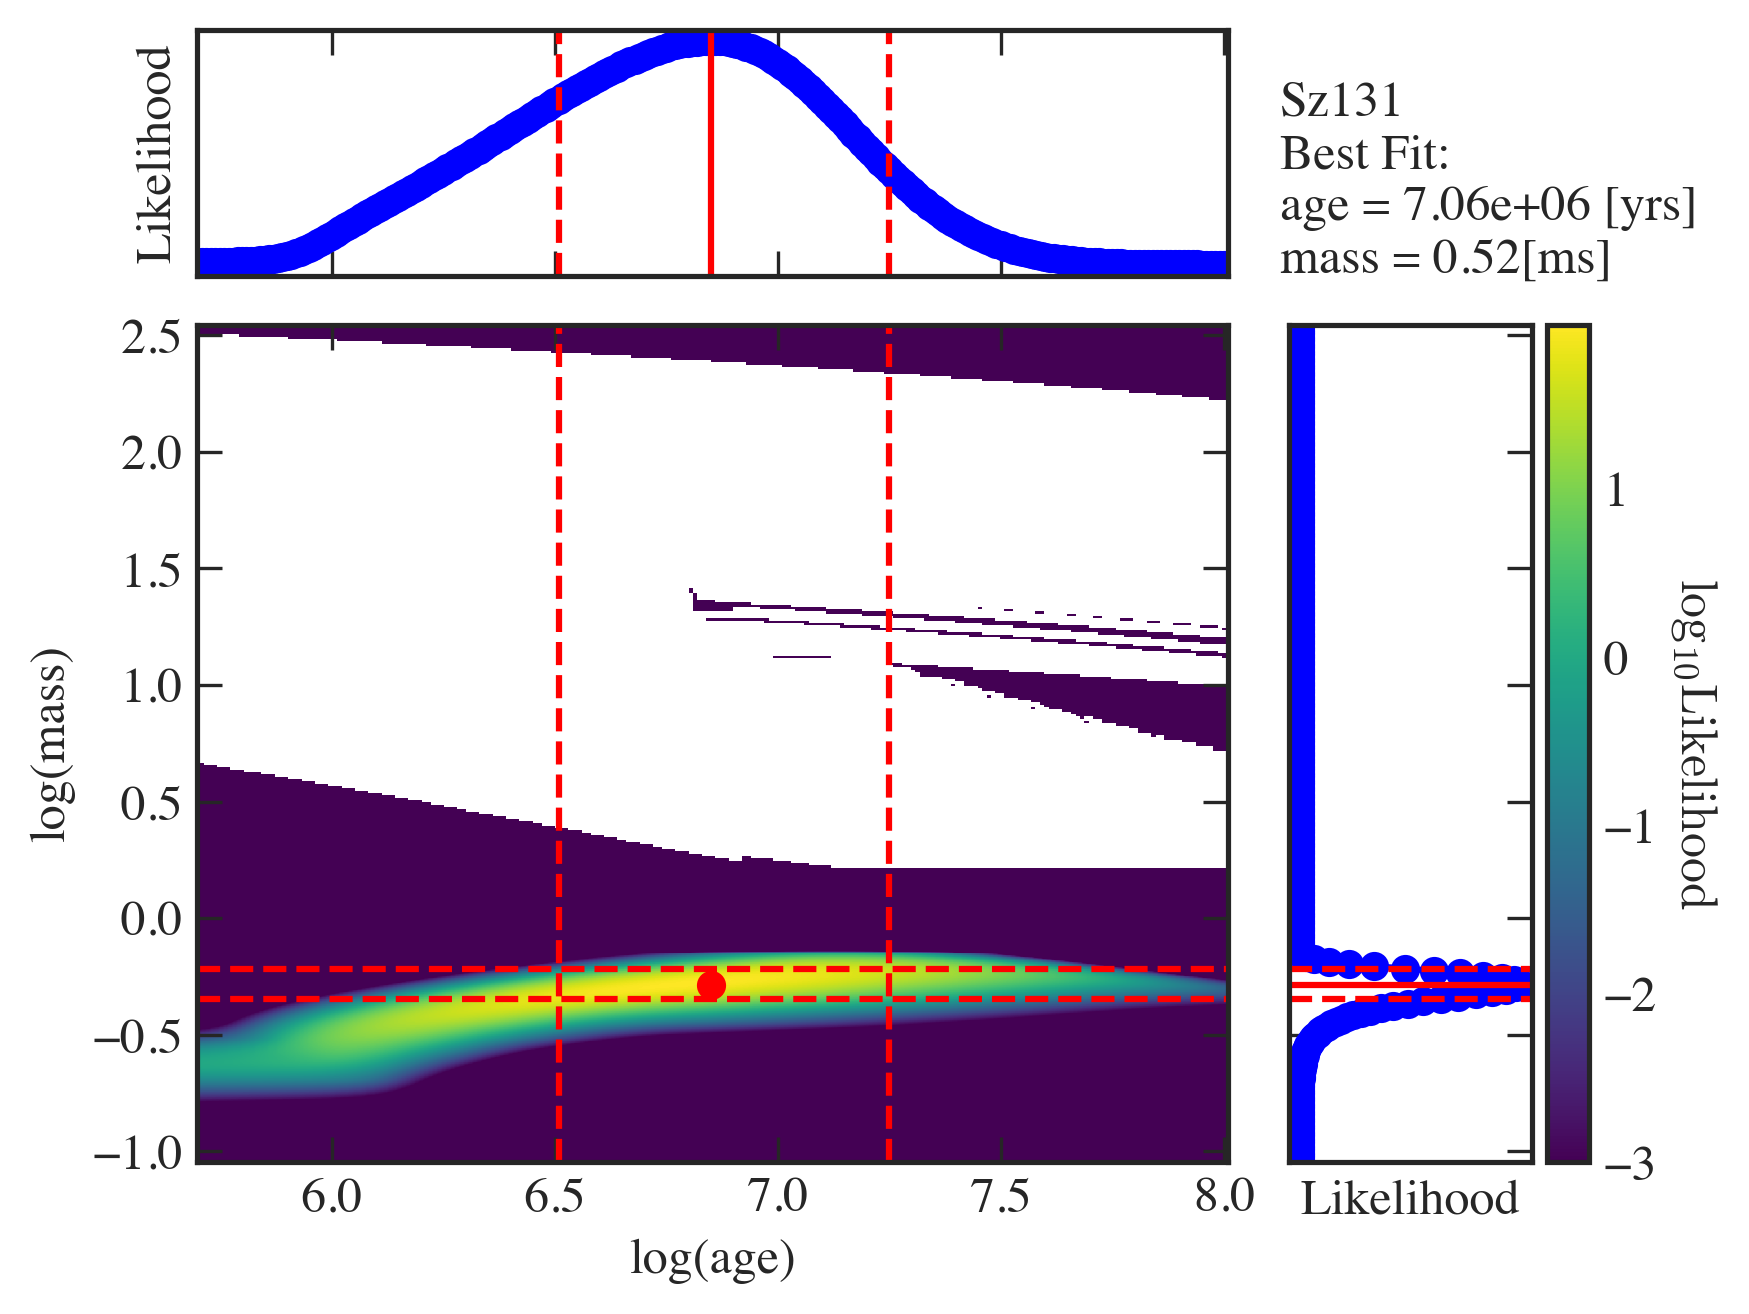

/Users/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:106: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/Users/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:114: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = plt.colorbar(im)


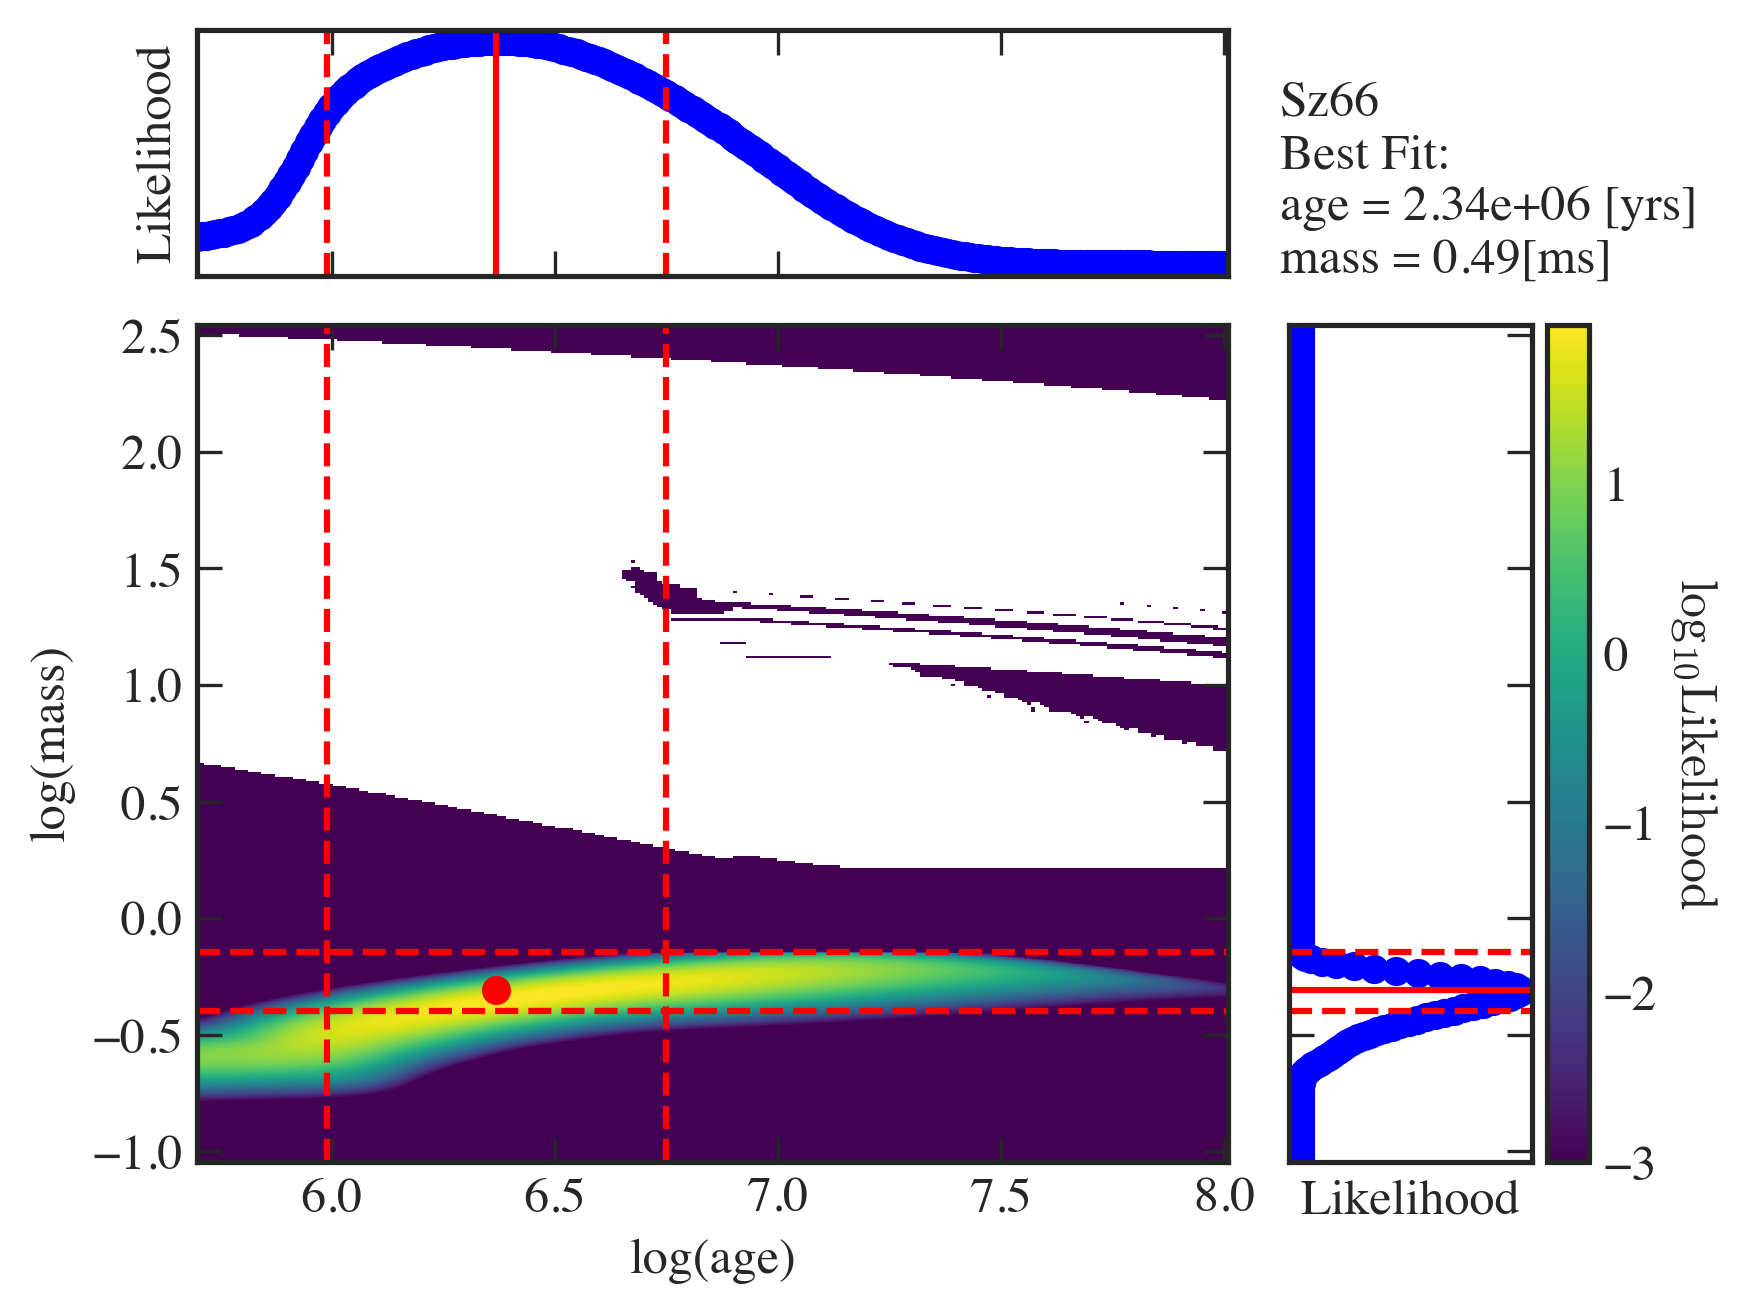

/Users/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:106: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/Users/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:114: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = plt.colorbar(im)


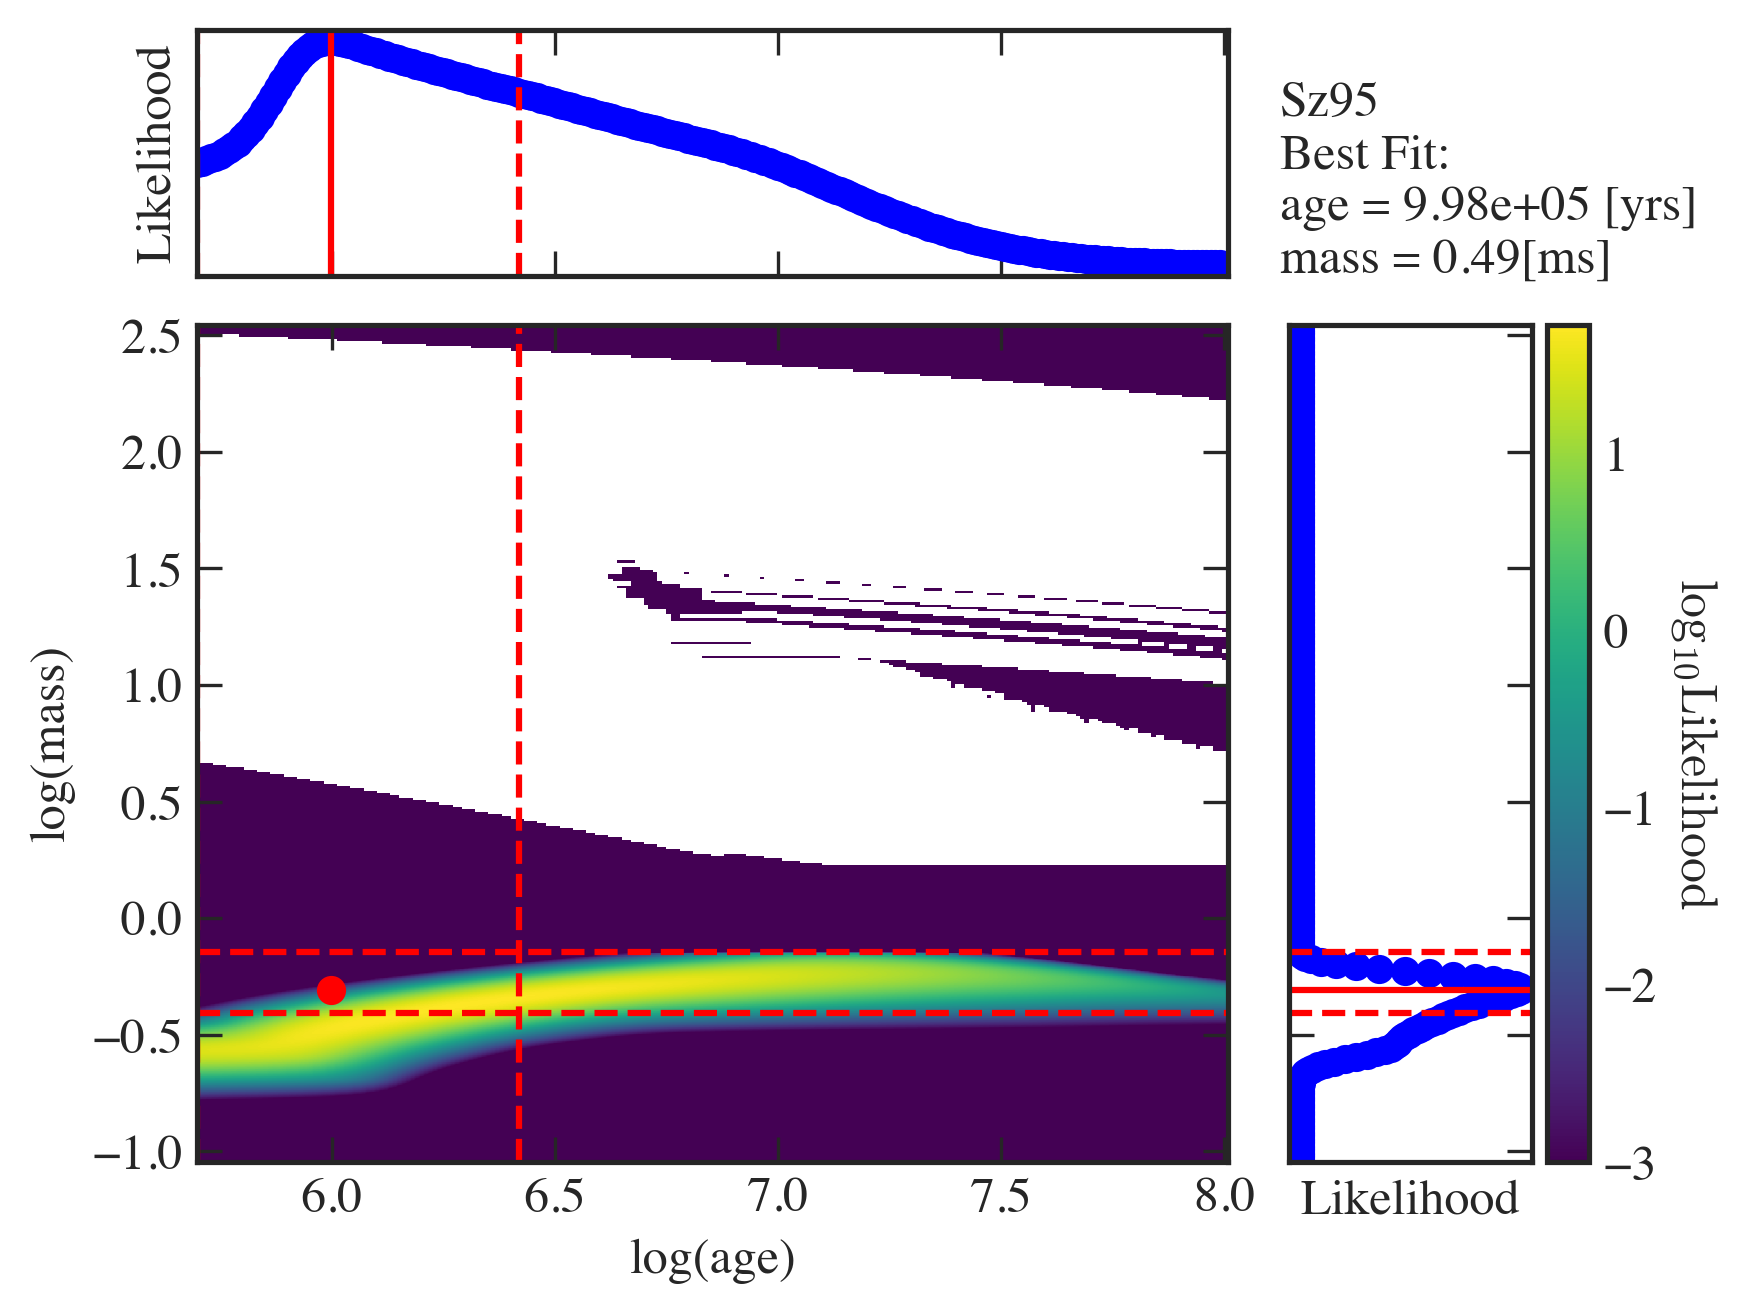

/Users/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:106: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/Users/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:114: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = plt.colorbar(im)


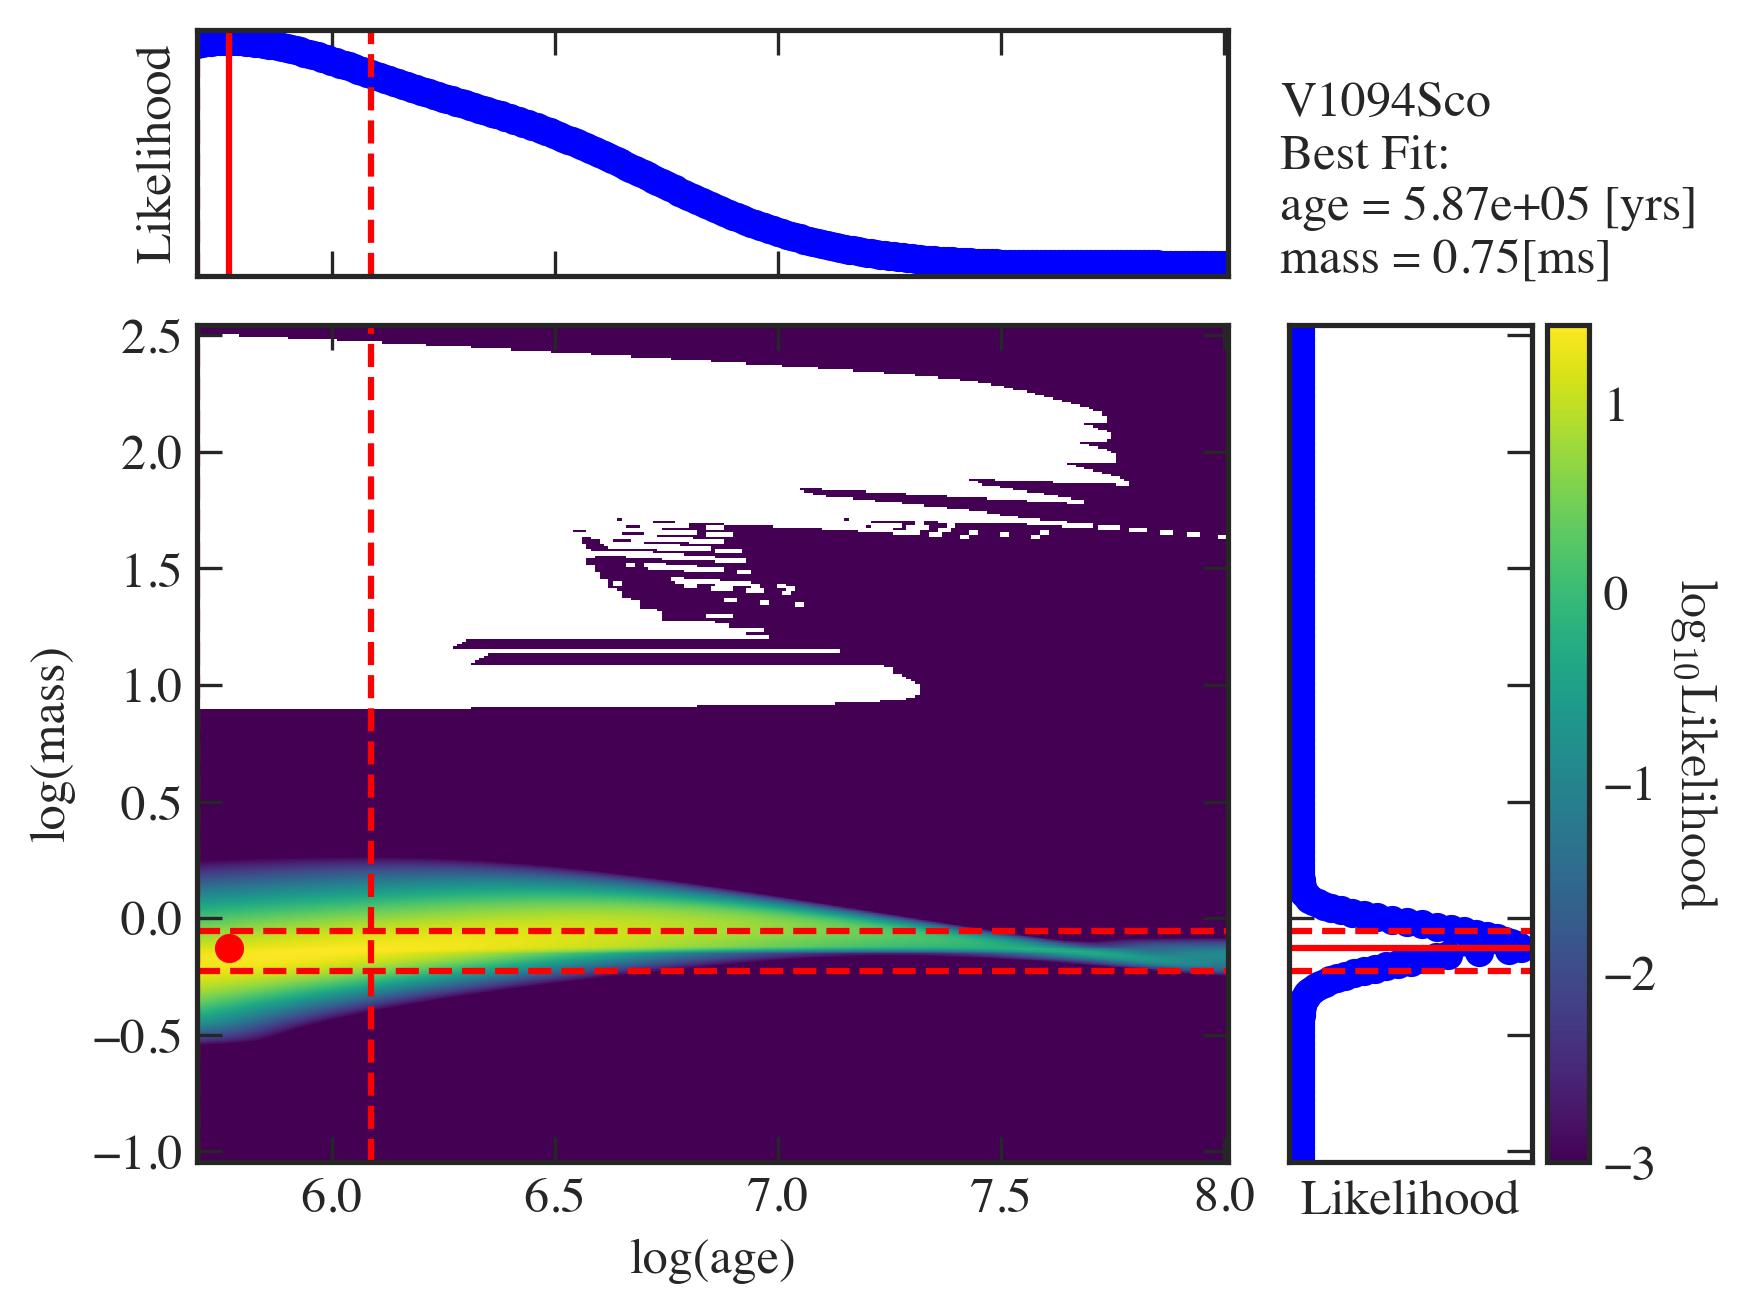

In [7]:
best_logmass_output, best_logage_output, lmass_all, lage_all =\
    ysoisochrone.bayesian.derive_stellar_mass_age(df_prop, model='PARSEC_v1p2', isochrone_data_dir=None, no_uncertainties=False, plot=True, save_fig=False, save_lfunc=False, fig_save_dir='figures', csv_save_dir='lfunc_data', verbose=False)

In [15]:
df_output_mass = pd.DataFrame(np.array(best_logmass_output), columns=['logmass[msolar]', 'lw_logmass[msolar]', 'up_logmass[msolar]'])
df_output_age = pd.DataFrame(np.array(best_logage_output), columns=['logage[yrs]', 'lw_logage[yrs]', 'up_logage[yrs]']) 
df_output = pd.concat([df_prop, df_output_mass, df_output_age], axis=1)

df_output.loc[:, 'masses[msolar]'] = 10**df_output.loc[:, 'logmass[msolar]']
df_output.loc[:, 'lw_masses[msolar]'] = 10**df_output.loc[:, 'lw_logmass[msolar]']
df_output.loc[:, 'up_masses[msolar]'] = 10**df_output.loc[:, 'up_logmass[msolar]']

df_output.loc[:, 'age[Myrs]'] = 10**df_output.loc[:, 'logage[yrs]']/1e6
df_output.loc[:, 'lw_age[Myrs]'] = 10**df_output.loc[:, 'lw_logage[yrs]']/1e6
df_output.loc[:, 'up_age[Myrs]'] = 10**df_output.loc[:, 'up_logage[yrs]']/1e6

df_output.to_csv('example_targets_o_parsec1p2.csv', index=False)

df_output

,Source,Teff,e_Teff,Luminosity,e_Luminosity,logmass[msolar],lw_logmass[msolar],up_logmass[msolar],logage[yrs],lw_logage[yrs],up_logage[yrs],masses[msolar],lw_masses[msolar],up_masses[msolar],age[Myrs],lw_age[Myrs],up_age[Myrs]
0,Sz65,4060,187.0,0.869,0.3623,-0.145757,-0.215757,0.264243,5.94897,5.69897,6.21897,0.714895,0.608475,1.837564,0.889140,0.500000,1.655656
1,Sz71,3632,167.0,0.327,0.1420,-0.235757,-0.335757,0.074243,6.27897,5.93897,6.62897,0.581089,0.461575,1.186431,1.900947,0.868900,4.255690
2,J16124373-3815031,3705,171.0,0.390,0.2691,-0.175757,-0.265757,0.134243,5.99897,5.69897,6.37897,0.667179,0.542304,1.362205,0.997631,0.500000,2.393150
3,Sz72,3560,164.0,0.272,0.1160,-0.245757,-0.355757,0.044243,6.34897,5.98897,6.72897,0.567862,0.440801,1.107242,2.233418,0.974922,5.357597
4,Sz77,4060,187.0,0.593,0.2428,-0.135757,-0.205757,-0.035757,6.18897,5.77897,6.53897,0.731547,0.622648,0.920964,1.545148,0.601132,3.459155
5,J16085324-3914401,3415,79.0,0.198,0.1477,-0.285757,-0.365757,-0.145757,6.06897,5.69897,6.58897,0.517896,0.430767,0.714895,1.172114,0.500000,3.881236
6,Sz131,3415,79.0,0.150,0.0583,-0.285757,-0.345757,-0.215757,6.84897,6.50897,7.24897,0.517896,0.451069,0.608475,7.062688,3.228271,17.740669
7,Sz66,3415,79.0,0.216,0.0920,-0.305757,-0.395757,-0.145757,6.36897,5.98897,6.74897,0.494587,0.402015,0.714895,2.338676,0.974922,5.610092
8,Sz95,3415,79.0,0.267,0.1842,-0.305757,-0.405757,-0.145757,5.99897,5.69897,6.41897,0.494587,0.392864,0.714895,0.997631,0.500000,2.624037
9,V1094Sco,4205,193.0,1.210,0.8633,-0.125757,-0.225757,-0.055757,5.76897,5.69897,6.08897,0.748587,0.594624,0.879513,0.587449,0.500000,1.227354


## Output from PARSEC interface online

for using PARSEC v1.2

In [ ]:
#Id age age_68L age_68U age_95L age_95U mass mass_68L mass_68U mass_95L mass_95U
Sz65   3.711264       3.542250       3.933300       3.419700       4.169791       1.400614       1.372398
Sz71     -99.900000     -99.900000     -99.900000     -99.900000     -99.900000     -99.900000     -99.900000     -99.900000

for using MESA isochrones